# Principal Component Analysis

We're going to use our sample set to produce an eigenspace with lower dimension (tipically 100) and them project the test set into the eigenspace. Then, we're going to compare the original and the projected images.

In [1]:
import numpy as np
from PIL import Image
from scipy.linalg import eigh
from matplotlib import pyplot as plt

n_size=50 # New square size

# X0 is the matrix containing the sample set
X0=np.load('sample_n=17716_dim=50.npy')

In [2]:
avg=X0.mean(0)
# Mean of the set is subtracted and stored in avg
X=X0-avg

In [3]:
## Covariance matrix
n_eig=100 #number of eigenvectoors
n_img,n_dim=X.shape # number of images  (rows) and pixels per image (cols)

# Convariance matrix
S=np.cov(X.T)
Ns=len(S)

In [4]:
# Returns the 100 evecs with largest evals
evals,evecs=eigh(S,subset_by_index=[Ns-100,Ns-1])

In [5]:
# Saving data
n_eig=100

np.save('evecs_neig=' +str(n_eig)+ '_nsample=' +str(n_img)+ '_imgsz='+str(n_size)+ '.npy', evecs)
np.save('evals_neig=' +str(n_eig)+ '_nsample=' +str(n_img)+ '_imgsz='+str(n_size)+ '.npy', evals)

In [6]:
# Visualization of eigenvectors

# first 10 eigenvectors/eigenvalues
top_evals=evals[100-10:-1]
top_evecs=evecs[:,100-10:-1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


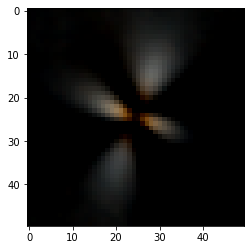

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


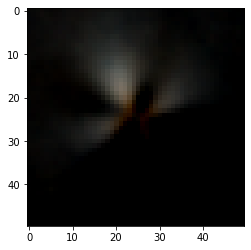

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


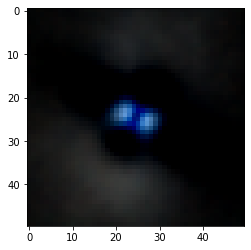

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


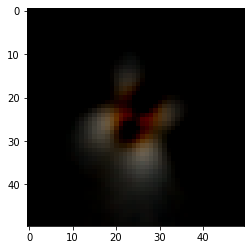

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


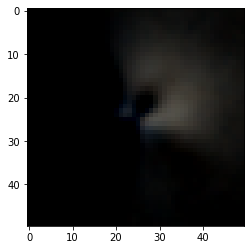

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


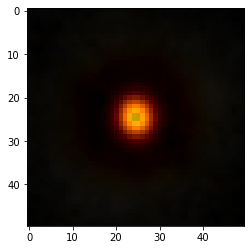

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


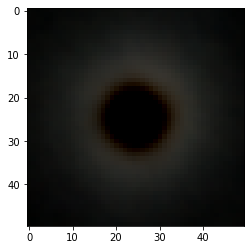

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


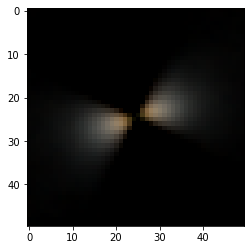

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


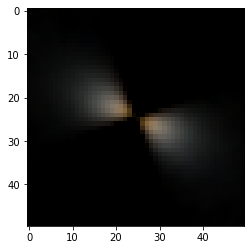

In [7]:
# Visualization of the 10 principal eigenvectors (largest eigenvalues)

for n in range(len(top_evals)):
    plt.imshow((10*top_evecs.T[n,:]).reshape(n_size,n_size,3),interpolation='nearest')
    plt.savefig('eigenvectors/eval='+str(top_evals[n])+'.jpg')
    plt.show()
        

In [12]:
# Projecting the test set into the constructed eigenspace

test_set=np.load('test_n=20_dim=50.npy')
Y=test_set-avg

scores=Y@evecs
test_pca=scores@evecs.T + avg

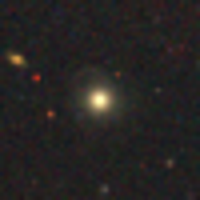

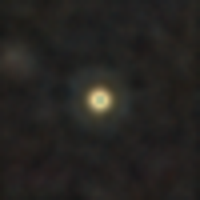

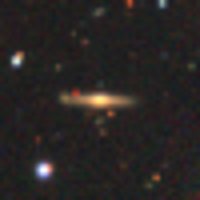

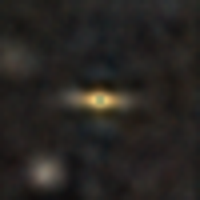

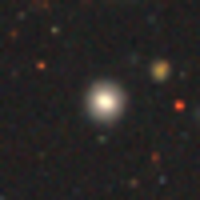

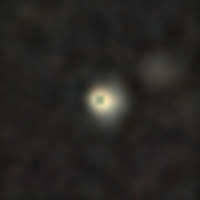

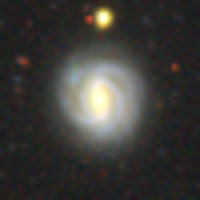

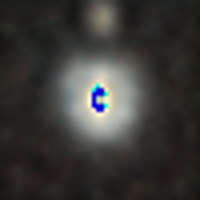

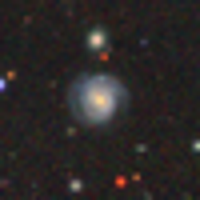

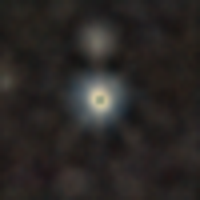

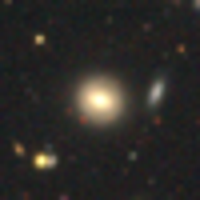

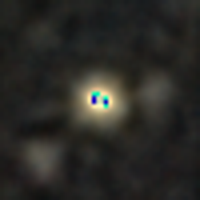

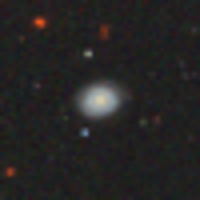

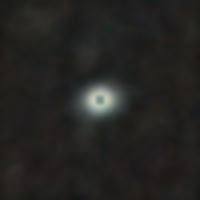

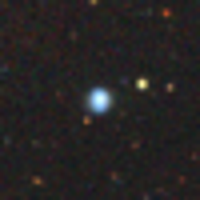

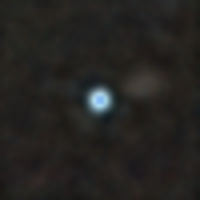

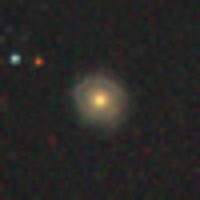

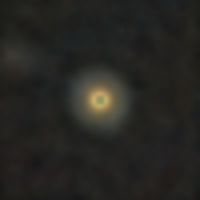

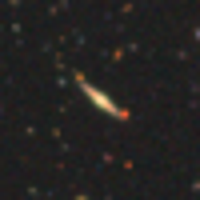

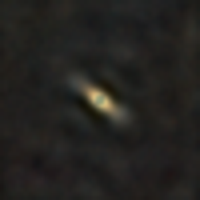

In [11]:
# Loading original images vs reconstructed ones
for n in range(10):
    img0=Image.fromarray(test_set[n,:].reshape(n_size,n_size,3).astype(np.uint8))
    img_pca=Image.fromarray(test_pca[n,:].reshape(n_size,n_size,3).astype(np.uint8))
    display(img0.resize((200,200)) )
    display(img_pca.resize((200,200)) ) 
    